# CAPSTONE PROJECT : CYBER SECURITY

# by SHAKTI NATH SAINI

### Importing the necessary libraries

In [34]:
!pip install seaborn

In [35]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
### Reading the input file and observing some of the key statistics of the dataset


In [37]:
data = pd.read_csv('dataset.csv')

In [38]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [39]:
data.head().T

,0,1,2,3,4
index,1,2,3,4,5
having_IPhaving_IP_Address,-1,1,1,1,1
URLURL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1


In [40]:
# The columns contained in the data set

data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [41]:
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Getting the most common classes from the dataset

from collections import Counter

classes = Counter(data['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

### Exploratory Data Analysis of the Dataset

### We check the null values in the data set and identify the distribution of the different features in the dataset.

### Checking for Nulls in the Dataset

In [46]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

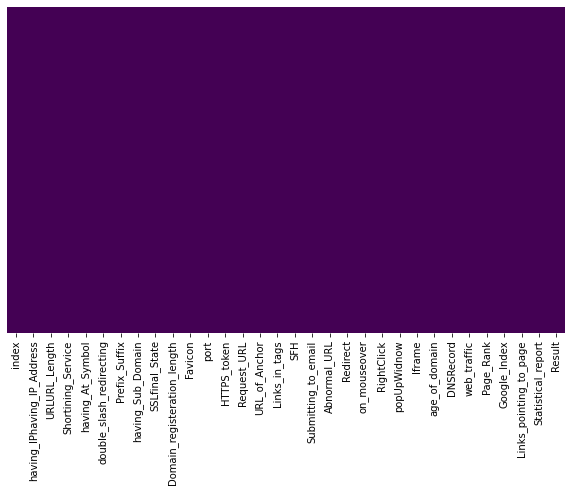

In [47]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-deep')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.show()

### Plotting the distribution of data in the data set

Text(0.5, 1.0, 'Histogram of Result Values')

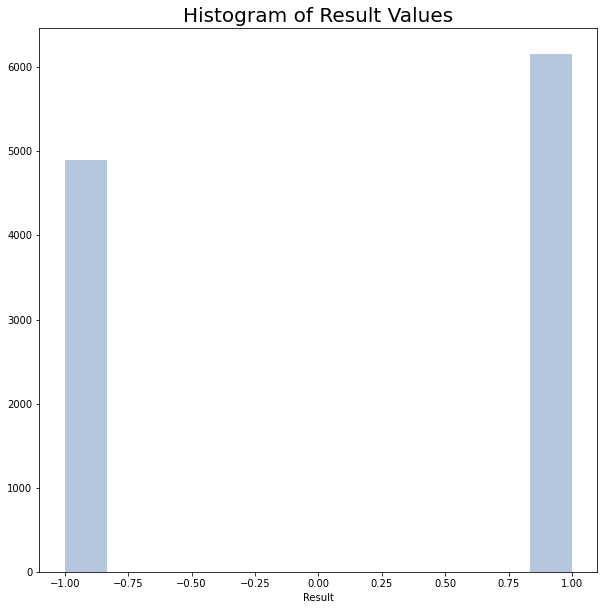

In [49]:
# Plot distribution of classes using Histograms
plt.figure(figsize =(10,10))

p = sns.distplot(data['Result'], kde=False)
p.set_title('Histogram of Result Values', fontsize = 20)

# It shows that benign class have about 1000+ observations than malware

### Plot of features

#### In order to plot the features, we first create two distinct data sets with the features and outcomes. We use a for loop to plot all the features, differentiated on the basis of the Results column

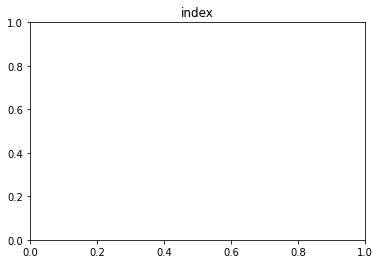

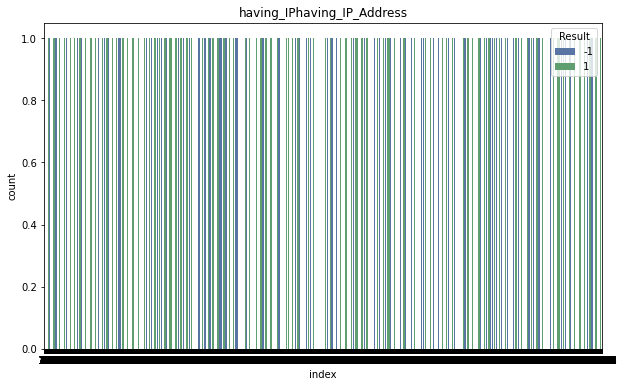

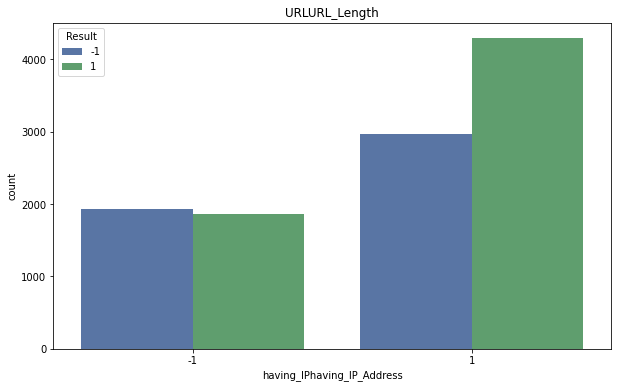

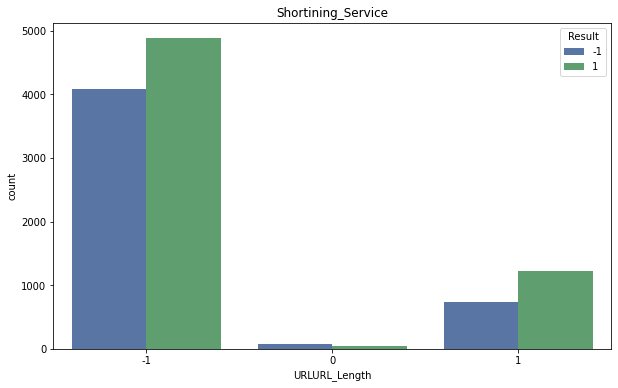

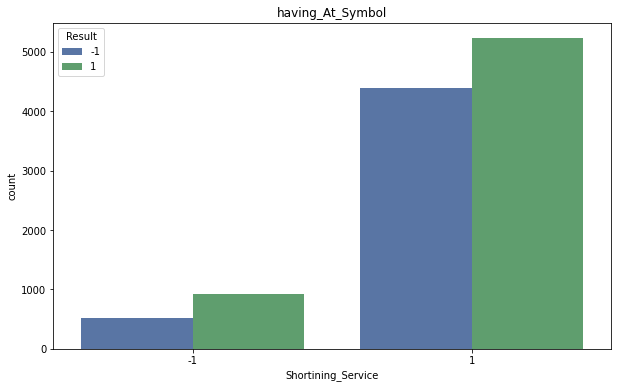

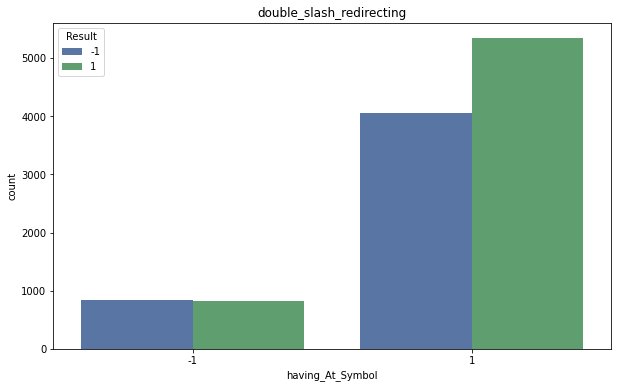

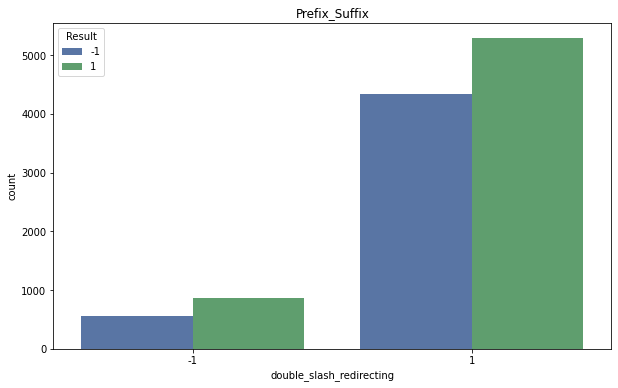

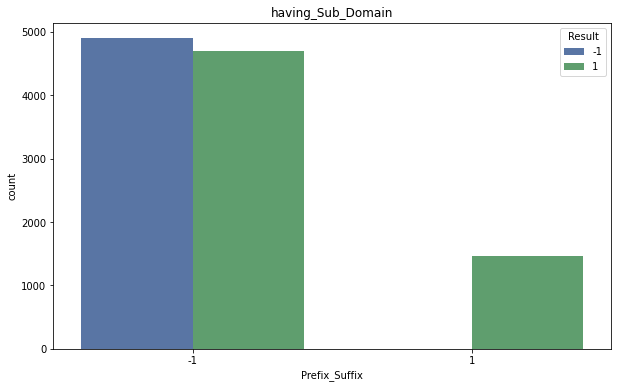

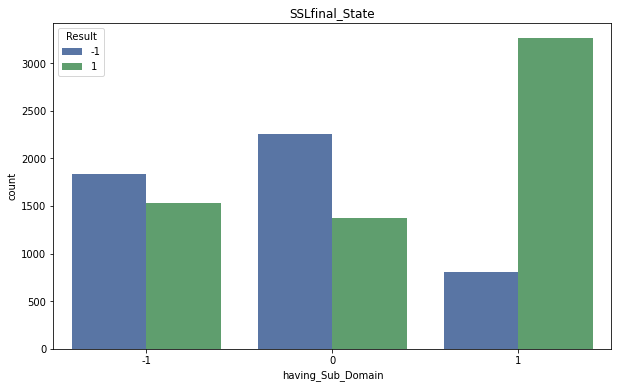

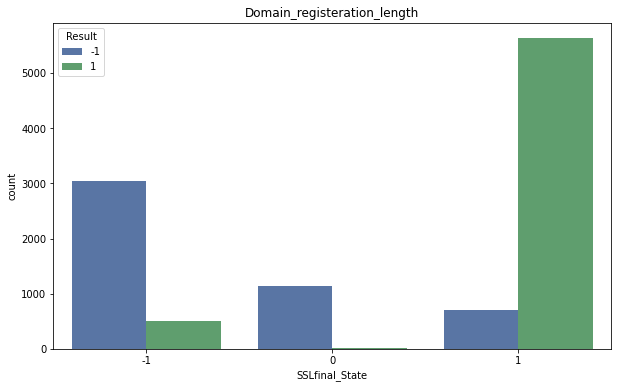

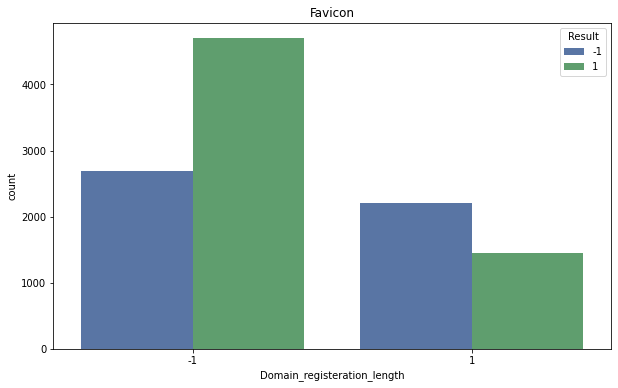

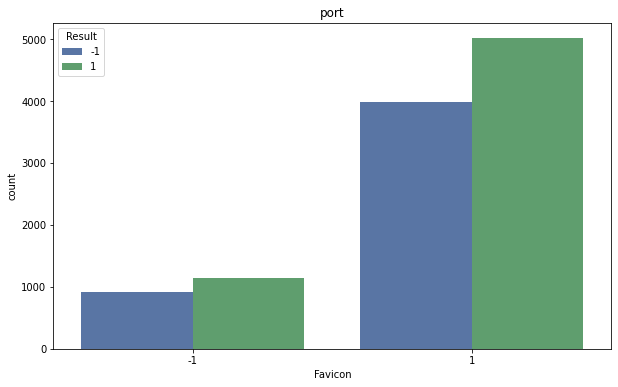

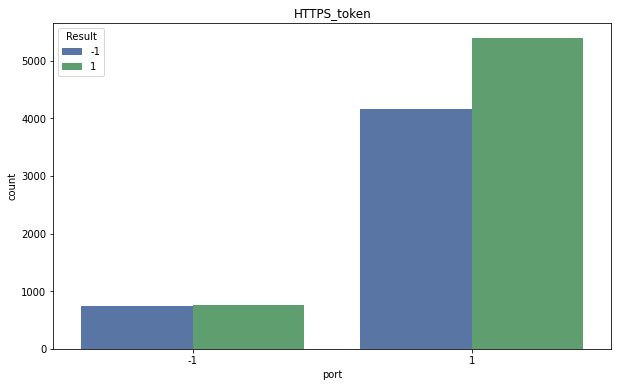

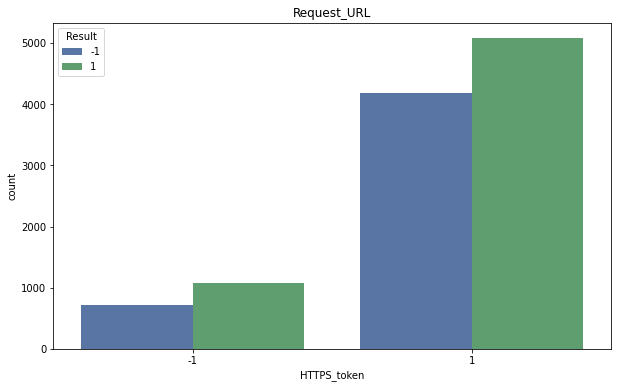

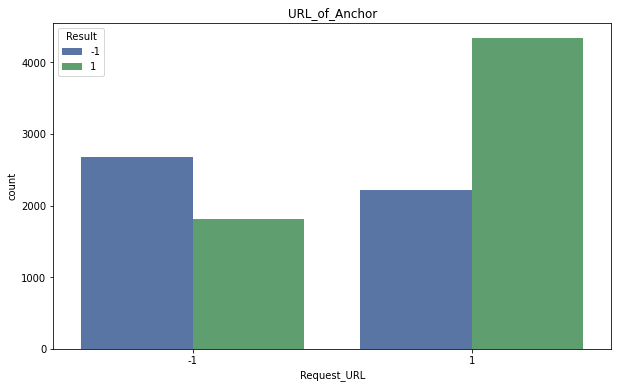

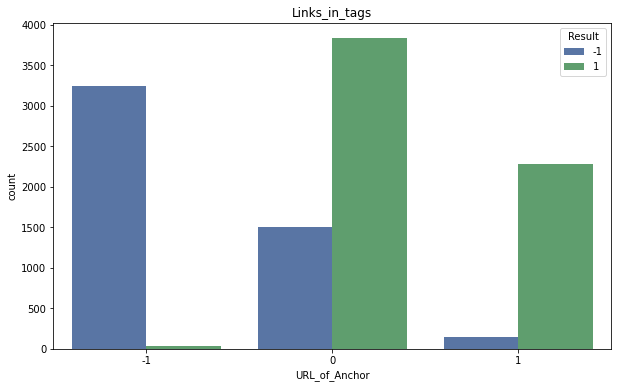

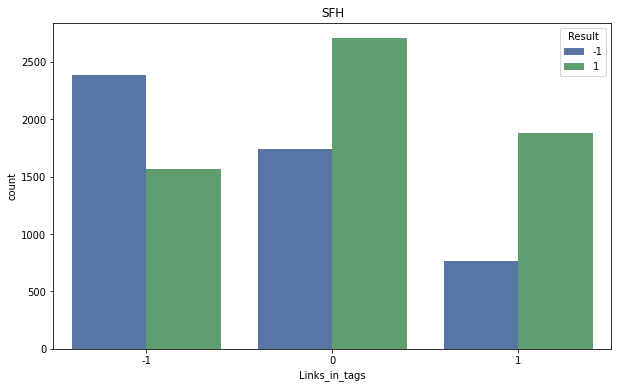

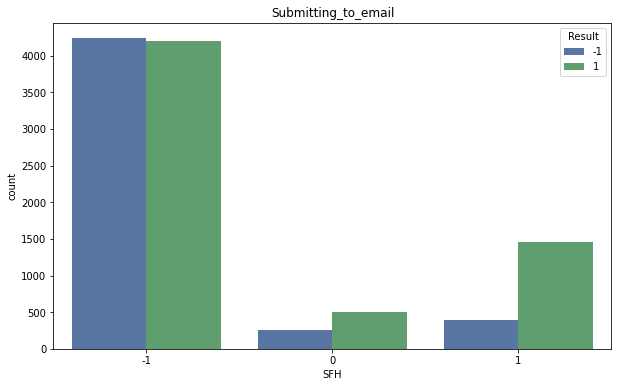

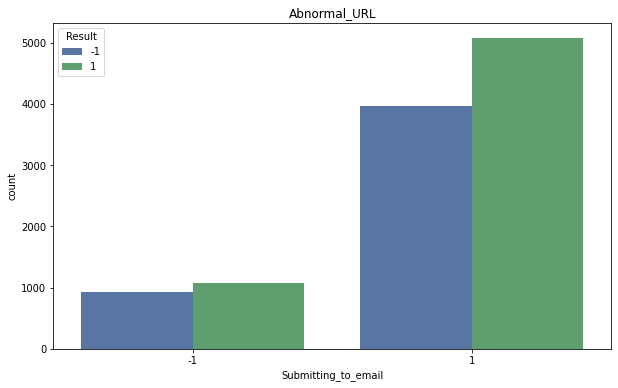

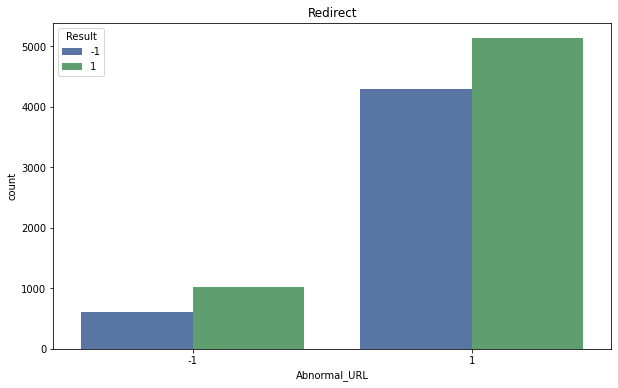

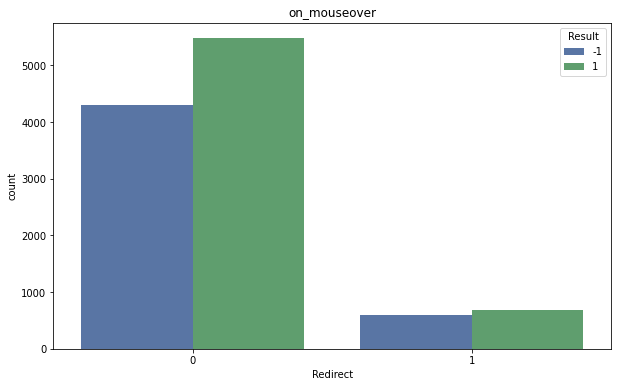

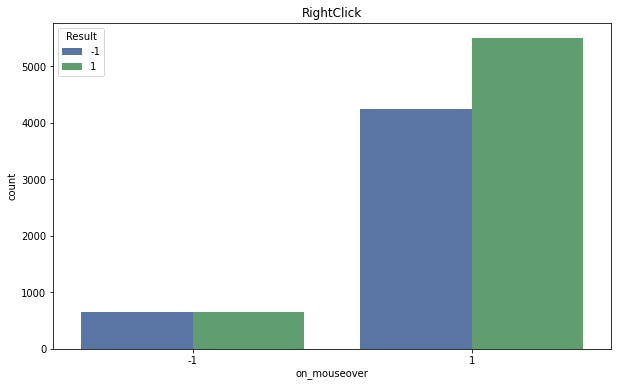

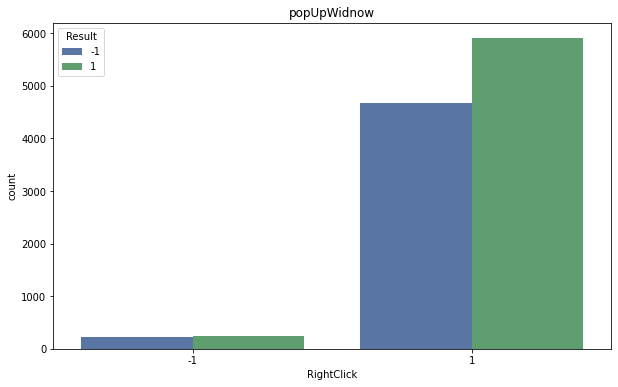

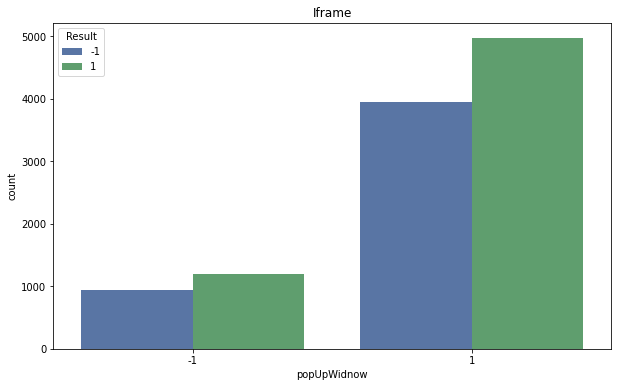

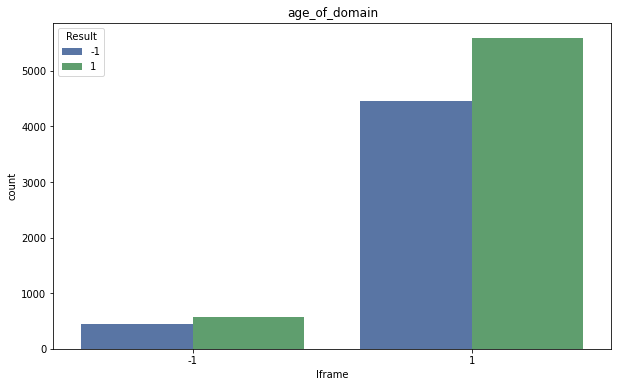

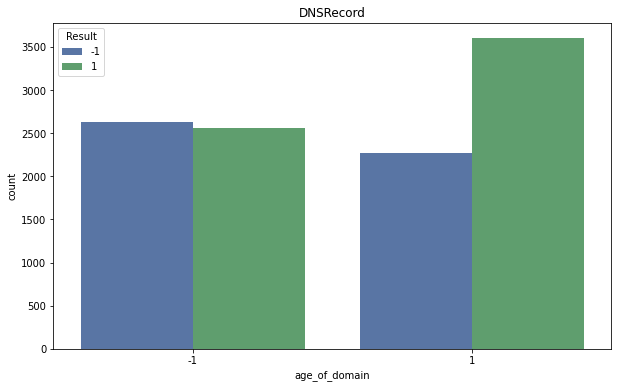

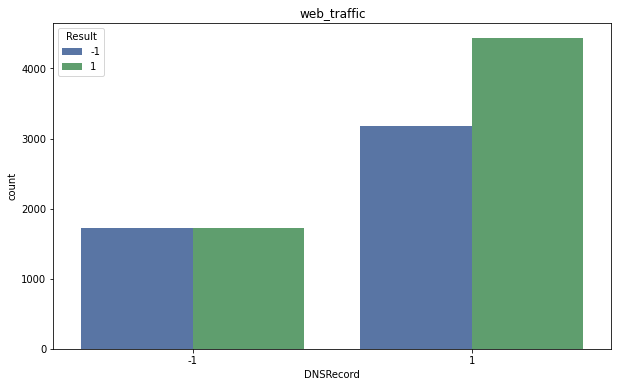

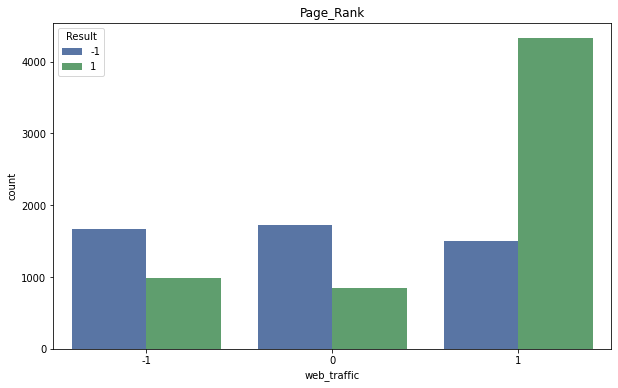

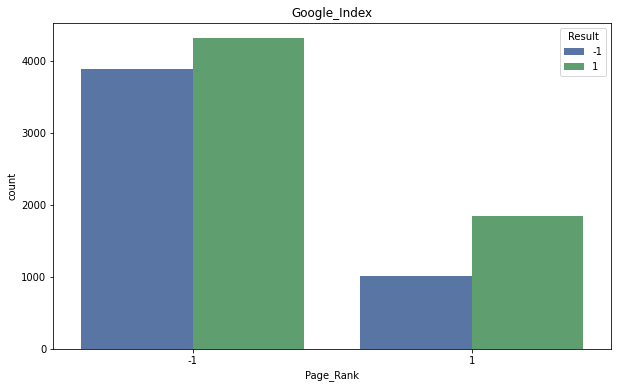

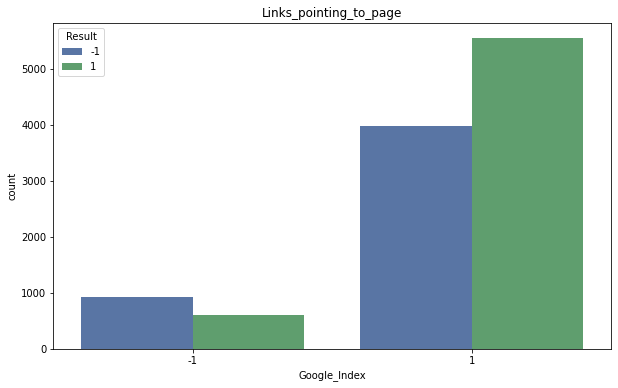

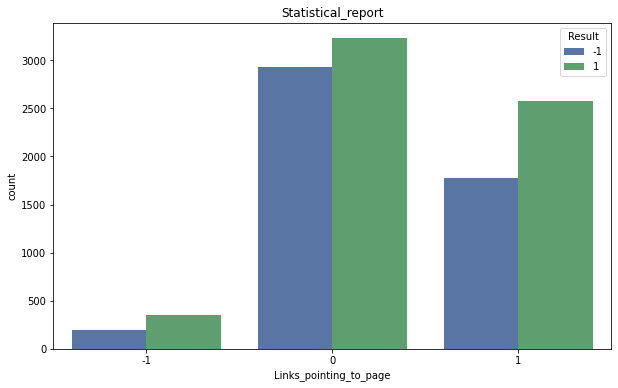

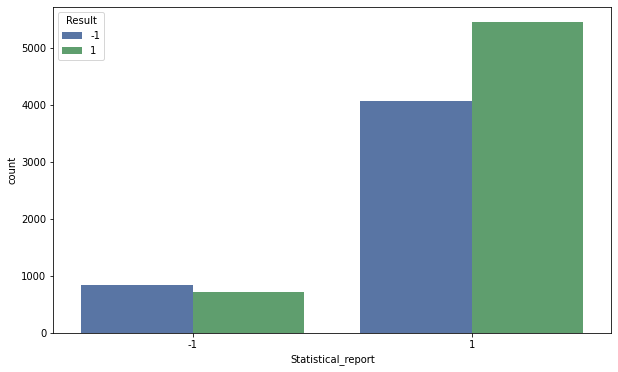

In [52]:
result = data['Result']
features = data.drop(['Result'], axis=1)


for i in features.columns:
    plt.title("%s"%i)
    plt.figure(figsize=(10,6))
    sns.countplot(data[i],hue=data['Result'])

##### Feature Selection

We use correlation to identify the least significant features and remove them from the data. This way, we can work with features that are more connected to the final outcome. By looking at the correlation of the different variables to the output (Result column) and dropping the features that have less than -/+ 0.03 correlation to it, we arrive a set of features that can help explain the final outcome.

Using this approach, we observe that we can drop the following columns:

*Favicon,
*Iframe,
*Redirect,
*popUpWidnow,
*RightClick,
*Submitting_to_email

In [53]:
print(data.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [54]:
# Remove features having correlation coeff. between +/- 0.03
data.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(data.columns))

26


### We plot the correlations on a heatmap for a visual image.

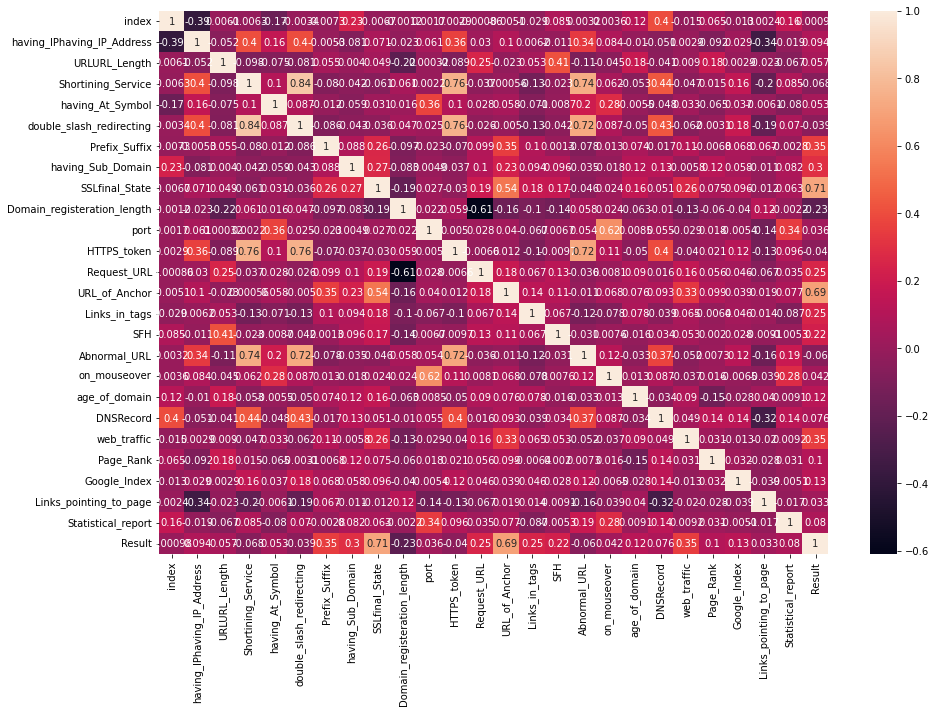

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

### Preparing the data for the Models

In [58]:
y = data['Result'].values
X = data.drop(['Result'], axis = 1)

from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Split the data as training and testing data - 70% train size, 30% test size
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = None)

### Classification using Logistic Regression, Random Forest Classifier, SVM

Accuracy with Log Reg: 0.9213144407597227
Conf matrix Log Reg: [[1331  147]
 [ 114 1725]]
Accuracy with RF classifier: 0.965330117576123
Conf matrix RF classifier: [[1408   70]
 [  45 1794]]
Accuracy with SVM-Linear: 0.9228218269520652
Conf matrix SVM-linear: [[1313  165]
 [  91 1748]]
Accuracy with KNN with 3 neighbours: 0.622851974675912
Conf matrix KNN: [[ 823  655]
 [ 596 1243]]


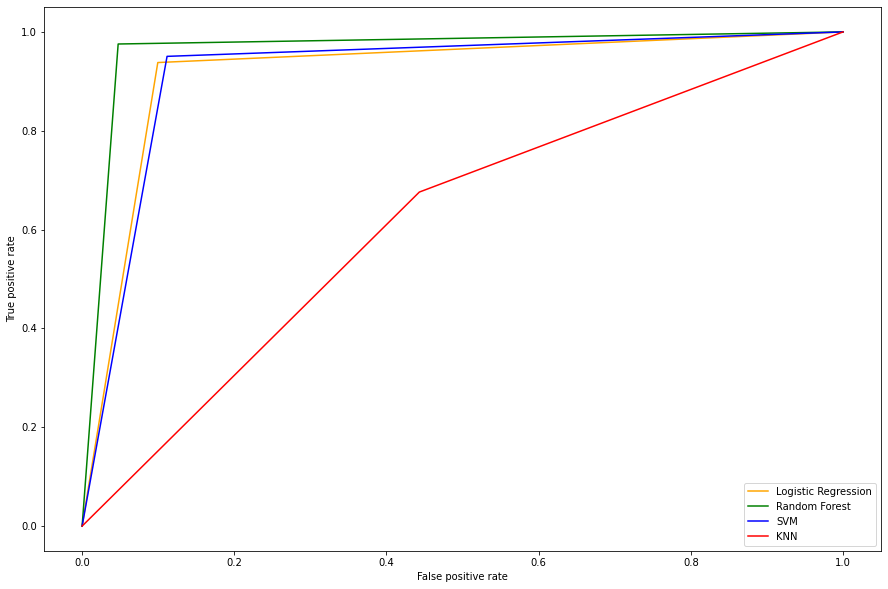

In [60]:
# ==================================================================================================
# CLASSIFICATION USING LOGISTIC REGRESSION
# ==================================================================================================
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)

print("Accuracy with Log Reg:", accuracy_score(y_test, prediction))
print ("Conf matrix Log Reg:",confusion_matrix(y_test,prediction))

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

# ====================================================================================================

# ====================================================================================================
# CLASSIFICATION USING RANDOM FOREST CLASSIFIER 
# ==================================================================================================
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)

print("Accuracy with RF classifier:",accuracy_score(y_test, prediction)) 
fpr,tpr,thresh = roc_curve(y_test,prediction)      
roc_auc = accuracy_score(y_test,prediction)         # Calculate ROC AUC

# Plot ROC curve for Random Forest
plt.plot(fpr,tpr,'g',label = 'Random Forest')
plt.legend("Random Forest", loc='lower right')
plt.legend(loc='lower right')
print("Conf matrix RF classifier:",confusion_matrix(y_test,prediction))  #  Generate confusion matrix


# ====================================================================================================

# ====================================================================================================
# CLASSIFICATION USING SVM - LINEAR 
# ==================================================================================================

from sklearn.svm import SVC
svc_l = SVC(kernel = "linear", C = 0.025)
svc_l = svc_l.fit(X_train,y_train)
prediction = svc_l.predict(X_test)

print("Accuracy with SVM-Linear:",accuracy_score(y_test, prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for SVM-linear
plt.plot(fpr,tpr,'b',label = 'SVM')
plt.legend("SVM", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix SVM-linear:",confusion_matrix(y_test,prediction))

# ====================================================================================================

# ====================================================================================================
# CLASSIFICATION USING KNN 
# ==================================================================================================
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn_model= knn.fit(X_train,y_train)
prediction=knn_model.predict(X_test)

print("Accuracy with KNN with 3 neighbours:", accuracy_score(y_test, prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for KNN
plt.plot(fpr,tpr,'r',label = 'KNN')
plt.legend("KNN", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix KNN:",confusion_matrix(y_test,prediction))


plt.show()

### We check if the accuracy of KNN can be improved by looping over different values of neighbours

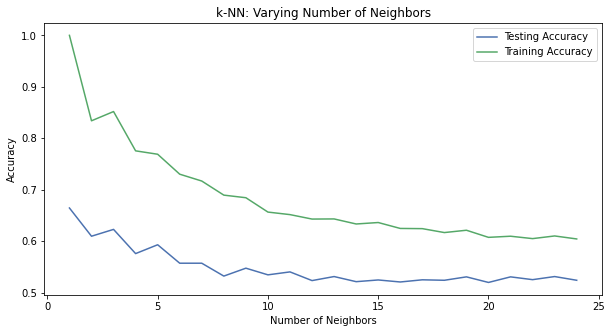

In [62]:
neighbors = np.arange(1, 25)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k )

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### There is some convergence of the training and testing accuracy around the 24 neighbours range indicating some move towards generalisation, but the accuracy levels are dropping. So, it is not something we should pursue.

#### Using K-Fold to validate the accuracy of the Random Forest Model - which seems to be the most accurate model among the tested ones.

In [66]:
from sklearn import model_selection
from sklearn.model_selection import KFold

seed = 13
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

rfc = RandomForestClassifier()

for fold_no in range (5):
    rfc = rfc.fit(X_train,y_train)
    results = model_selection.cross_val_score(rfc, X, y, cv=kfold)
    prediction = rfc.predict(X_test)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),results.mean()))

For Fold 0 the accuracy is 0.96924549761482
For Fold 1 the accuracy is 0.9691551635259751
For Fold 2 the accuracy is 0.9681604248320556
For Fold 3 the accuracy is 0.9693359135280207
For Fold 4 the accuracy is 0.9687933362244605


### Using K-Fold, we obtain an accuracy of slightly greater than the plain Random Forest Classifier. The peak value we have obtained using the K-Fold Technique is 96.93%